# Implementing Fisher Information for Hopfield Networks
Here, we use sparse patterns in Hopfield Networks to demonstrate the overcoming of catastrophic forgetting.
This notebook is used for comparing results of Normal Hebbian Learning (with a diminished learning rate such that the average learning rate fits the other cases) with learning where a certain number of weights are kept constant. The weights that are supposed to be kept constant are picked in 5 different ways:
1. Highest Fisher information
2. Lowest Fisher information
3. Connections with largest absolute value of the weighs
4. Connections where absolute value of weights exceeds a certain value
5. Highest Fisher information calculated by 'Adapted Hebbian Learning Rule'

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%run -i '../code/import_libraries.py'

In [13]:
from hopfieldNetwork import hopfieldNet
from solverFile import solverClass

## Define Hyperparameters
Can be changed and adapted.

In [14]:
ETA = 0.001 #learning rate
NTRAIN = 1000 #number of epochs
NUM_PATTERNS = 300 #number of patterns created
SPARSITY = 0.1 #number of zeros: e.g. SPARSITY = 0.1 means 10% ones and 90% zeros
IMAGE_SIZE = 10 #the size of our created pattern will be (IMAGE_SIZE x IMAGE_SIZE)
eval_f = 1 #evaluation frequency (every eval_f-th iteration) NOTE: currently not implemented
TRIALS = 100 #number of trials over which the results will be averaged in order to get smooth results
less_changed_weight_value = 0.00 #the learning rate of weights which are considered important have a learning
#rate of ETA * less_changed_weight_value
stored_patterns = 5 #number of patterns that are stored in the network before learning the new pattern
number_of_changed_values = 4750 #the number of weigths that are changed is 2*number_of_changed_values (The factor of 2
#is because of the symmetry of the weight matrix)
RUN_LOCAL = True #if False, the 3. and 4. in the description will be discarded for higher computational speed

## Running a Pre-Test
Output should be:
The overall_error is:    0.0
If not, set SPARSITY = 0.1 (script is not optimized regarding generality yet ;) )

In [5]:
netFisher = hopfieldNet(IMAGE_SIZE, ETA, SPARSITY)
solver = solverClass()
patterns = solver.create_patterns(SPARSITY, IMAGE_SIZE, NUM_PATTERNS)
mean_value = SPARSITY
original_patterns = copy.deepcopy(patterns)
patterns = patterns - mean_value
p = np.zeros(shape=(IMAGE_SIZE**2, IMAGE_SIZE**2))
for i in range(int(stored_patterns)):
    p += np.outer(patterns[:,i], patterns[:,i])
    netFisher.append_pattern(patterns[:,i], NTRAIN)
w1 = p/70

#print(w1)

netFisher.set_weights(w1)
overall_error = 0
for i in range(int(stored_patterns)):
    netFisher.present_pattern(original_patterns[:,i])
    netFisher.step(100)
    output = netFisher.s
    error = np.sum(original_patterns[:,i]-output)**2
    overall_error += error
print('The overall_error is:   ', overall_error)

The overall_error is:    0.0


## Define Dice coefficent as measure of accuracy
As it can be seen, the results improve for all five cases, apart from the second one, where the results deteriorate.
The measure of correctness is the Dice-coefficient, which is 2*cardinality(overlap(A,B)) / (cardinality(A) + cardinality(B)), with A being the results and B being the target for cells to be a 1.
Hence, a Dice-coefficient of 1 means perfect memory, 0 means no memory.

In [15]:
def dice_coefficient(p1, p2):
    p = 2 * np.sum(np.floor(0.6*(p1 + p2)))
    n = np.sum(p1)+np.sum(p2)
    return p/n

## Script to prove that Hebbian way of calculating Fisher Information is equal to variance

Max errro:  7.105427357601002e-15


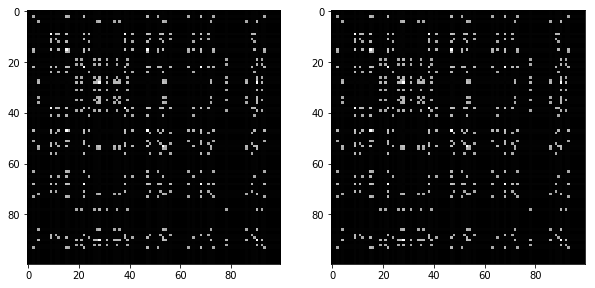

In [7]:
solver = solverClass()
patterns = solver.create_patterns(SPARSITY, IMAGE_SIZE, NUM_PATTERNS)
netFisher = hopfieldNet(IMAGE_SIZE, ETA, SPARSITY)
p = np.zeros(shape=(IMAGE_SIZE**2, IMAGE_SIZE**2))
mean_value = SPARSITY
original_patterns = copy.deepcopy(patterns)
patterns = patterns - mean_value
overall_pattern = np.zeros(shape = np.shape(patterns[:,0]))

netFisher.calculate_fisher_information(patterns[:,0:stored_patterns])
wF = netFisher.curvature
netFisher.calculate_fisher_information_hebbian(patterns[:,0:stored_patterns])
wH = netFisher.curvature
a = np.array_equal(wF,wH)
#print(wF)
#print(wH)
wD = wF - wH
max_error = np.amax(np.abs(wD))
summed_error = np.sum(wD**2)
print('Max errro: ', max_error)
plt.subplot(1,2,1)
plt.imshow(wF)
plt.subplot(1,2,2)
plt.imshow(wH)
plt.show()

## Traininig Phase
Might take a couple of minutes. Output should look like:

Started Learning

Running trial  1  /  3 

Running trial  2  /  3

Running trial  3  /  3

Finished

In [8]:
%run -i '../code/define_variables.py' #initializes all variables (mostly to zero)

<Figure size 720x576 with 0 Axes>

**Started Learning**

Running trial  1  /  100
The number of perturbed weights is (case 1):    9600.0


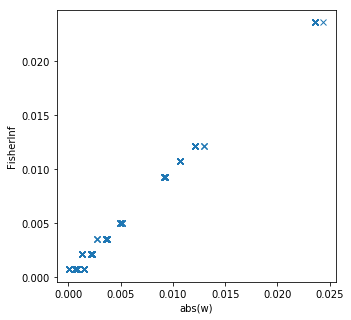

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

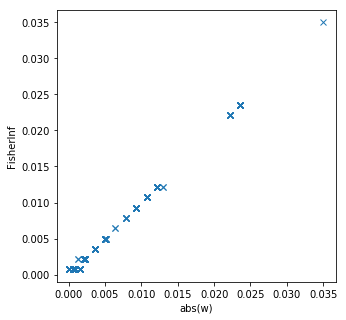

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

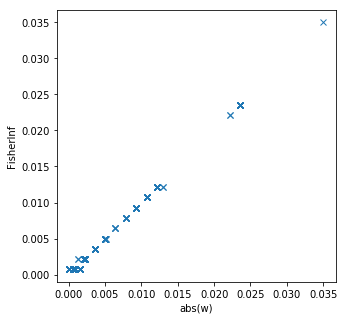

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number

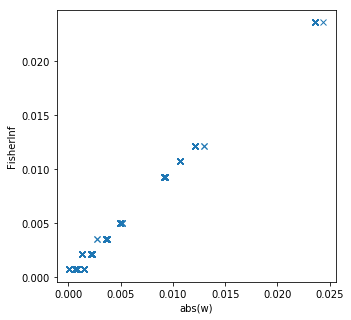

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number

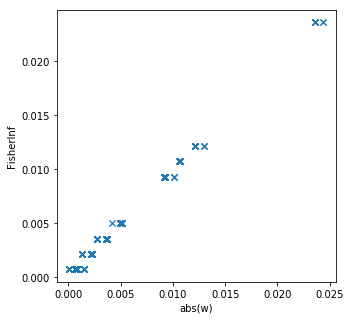

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

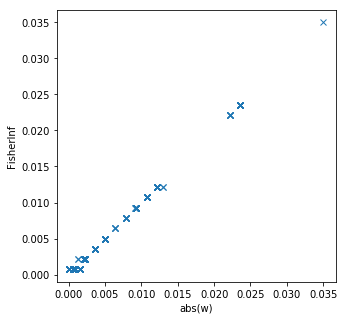

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

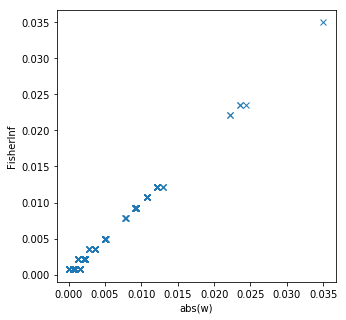

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

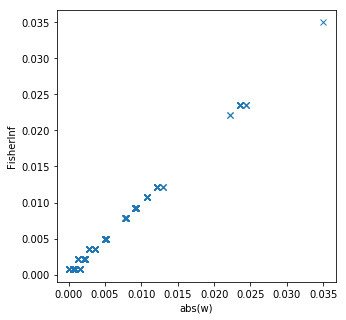

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

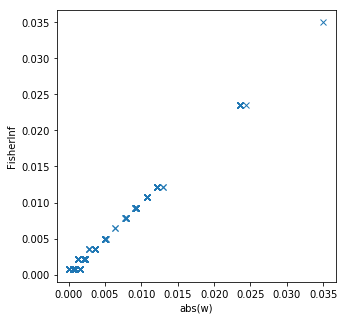

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number

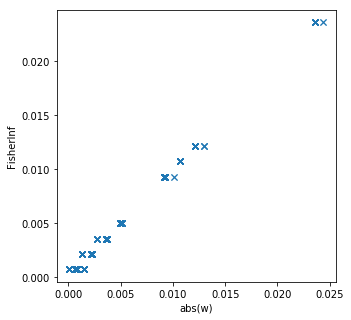

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

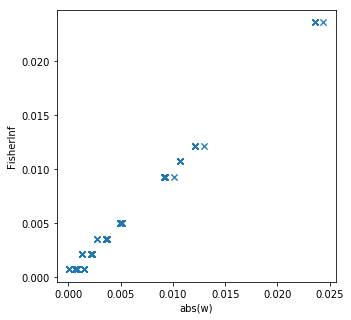

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

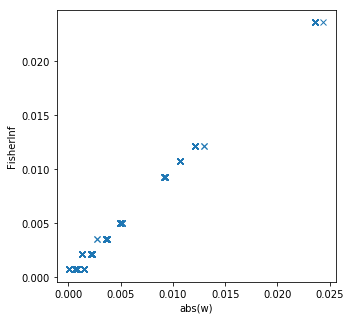

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

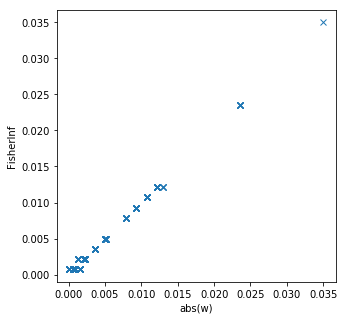

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

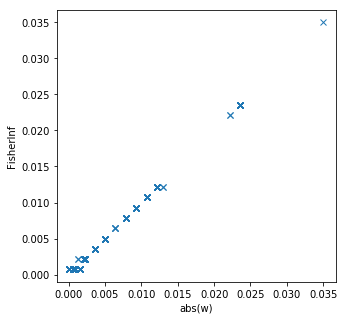

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number

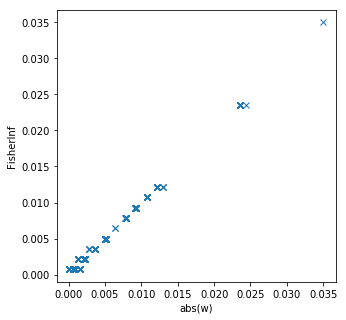

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

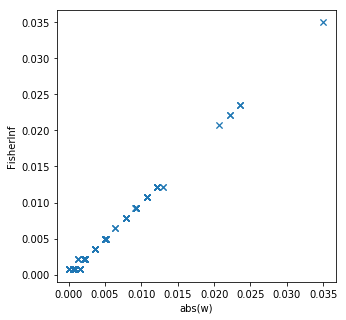

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number

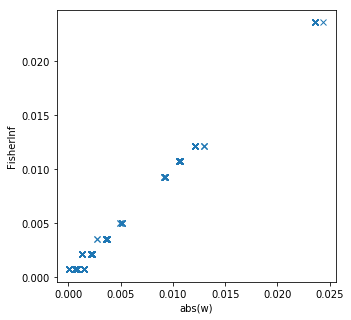

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

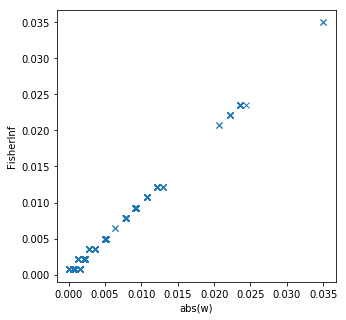

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number of perturbed weights is (case 2):    9582.0
The number

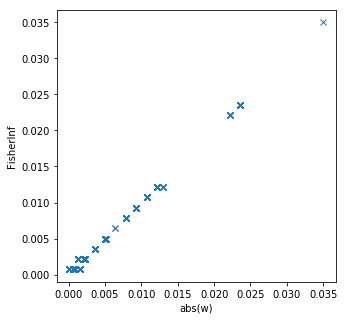

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

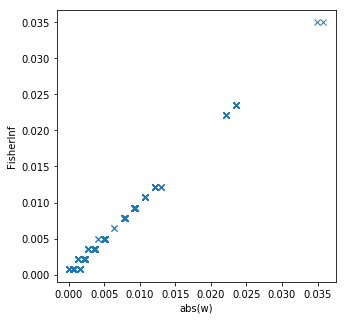

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number of perturbed weights is (case 2):    9578.0
The number

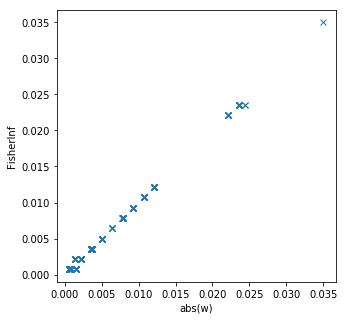

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number of perturbed weights is (case 2):    9590.0
The number

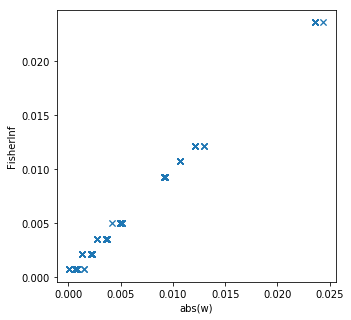

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

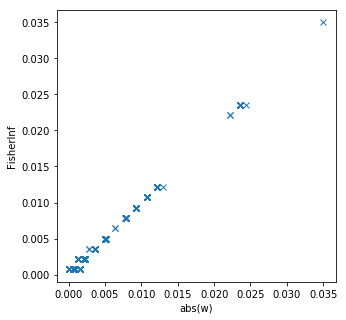

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number

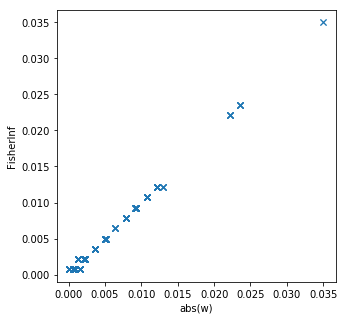

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number

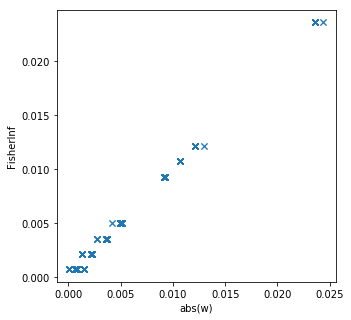

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

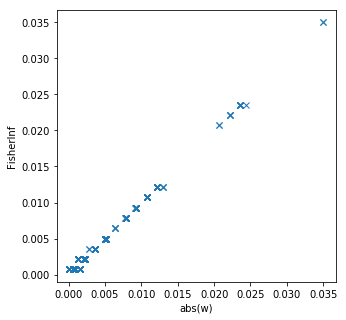

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

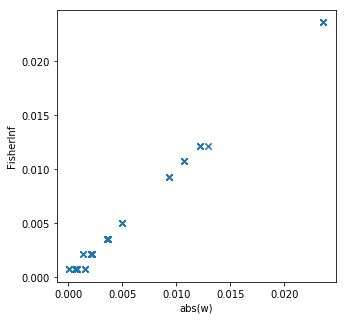

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number

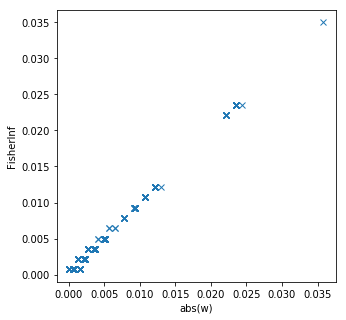

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

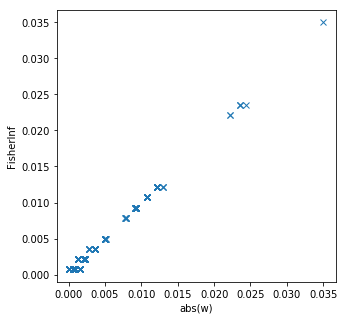

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

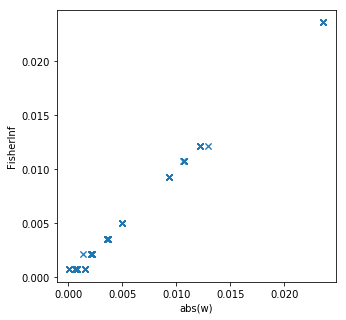

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

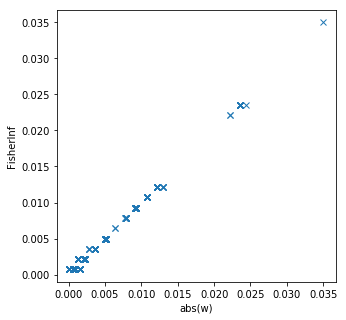

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number

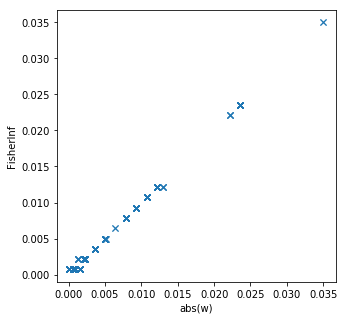

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number

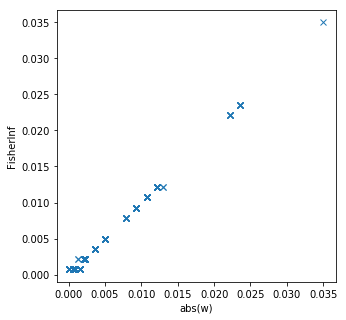

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number

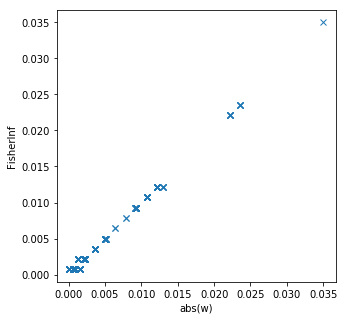

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

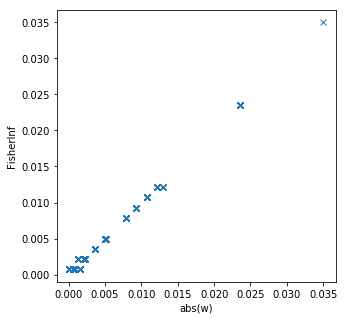

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

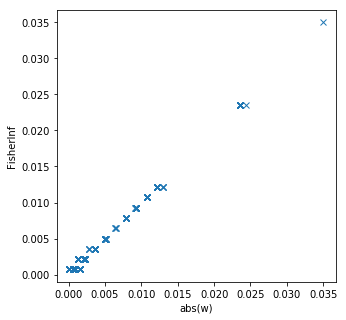

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number

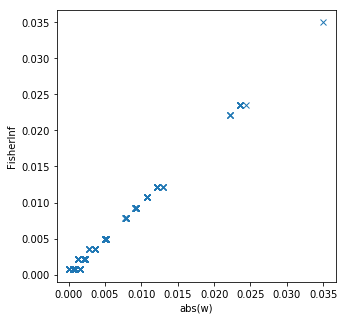

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number of perturbed weights is (case 2):    9568.0
The number

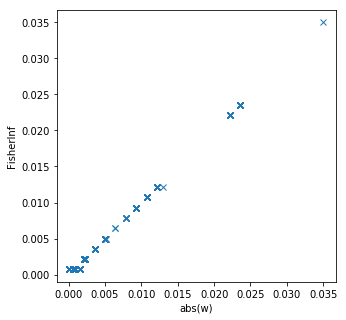

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

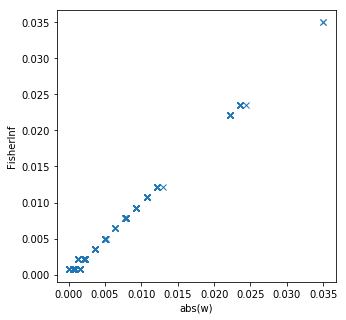

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number

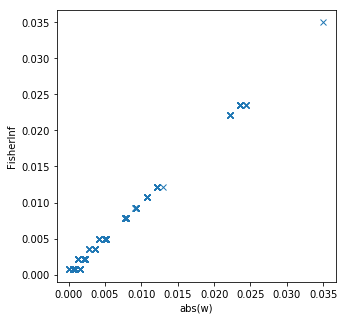

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number

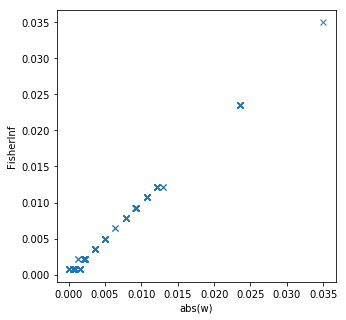

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

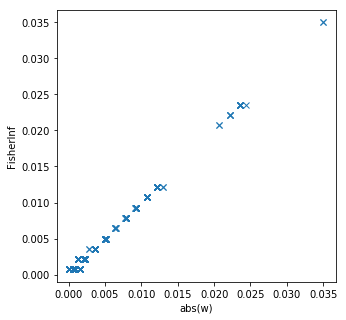

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number

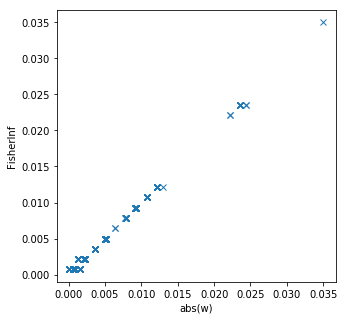

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number

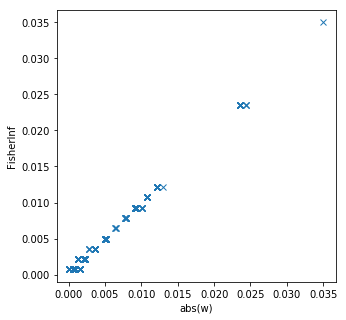

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number

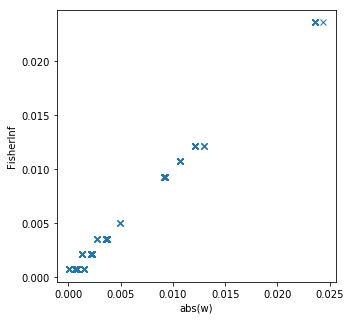

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

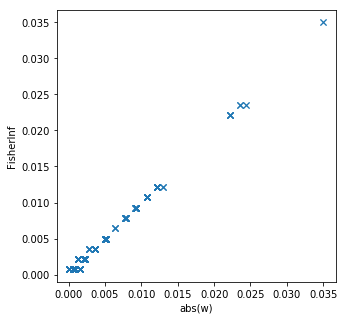

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

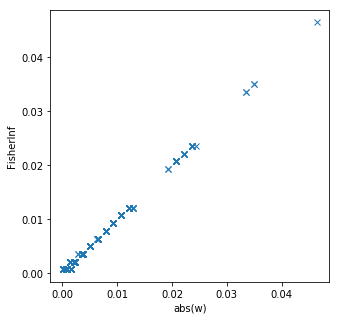

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number of perturbed weights is (case 2):    9634.0
The number

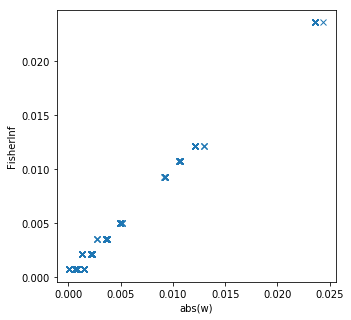

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

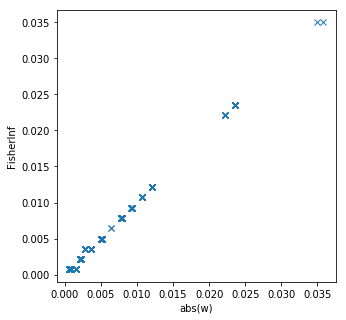

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number of perturbed weights is (case 2):    9586.0
The number

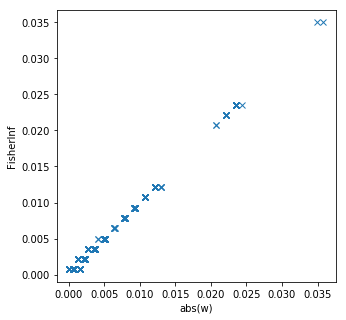

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number

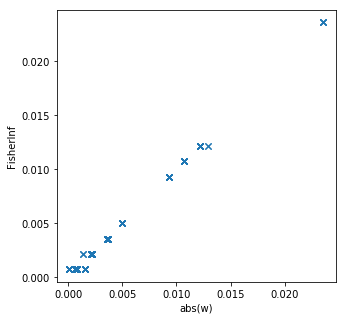

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number

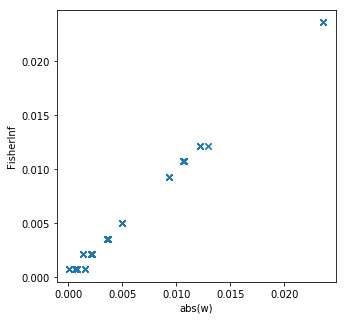

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

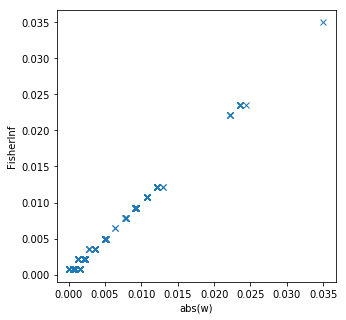

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

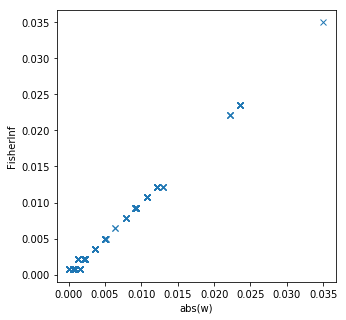

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number

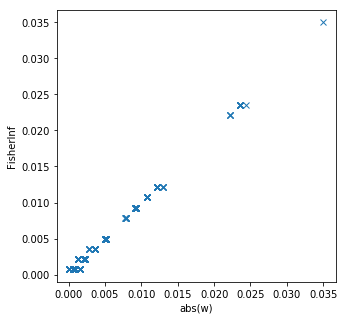

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number

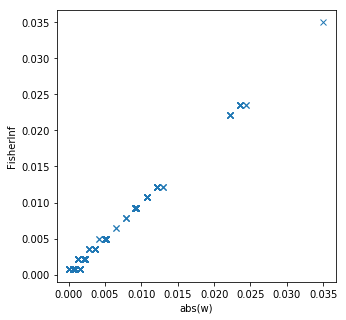

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number

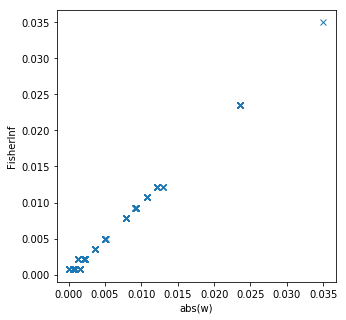

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

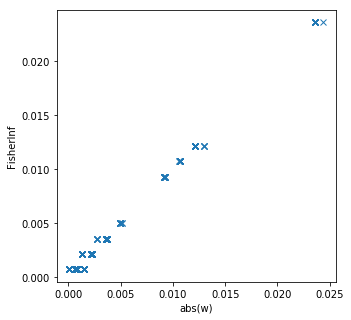

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

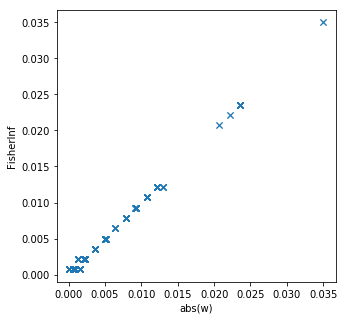

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

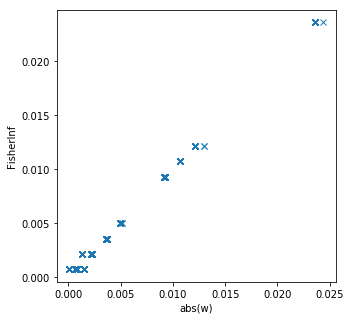

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

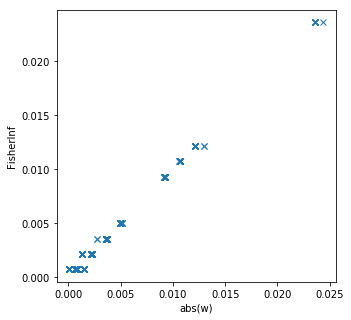

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

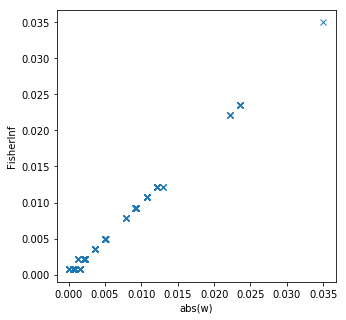

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

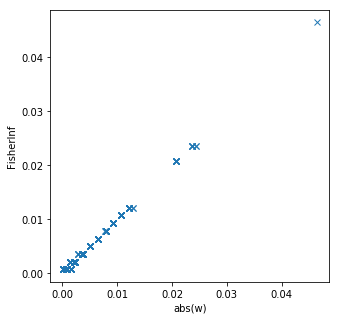

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number of perturbed weights is (case 2):    9614.0
The number

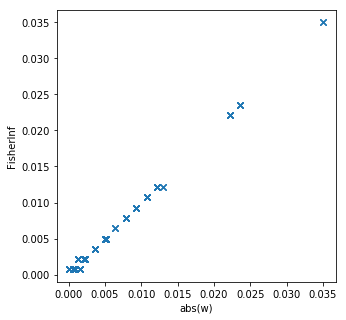

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number of perturbed weights is (case 2):    9600.0
The number

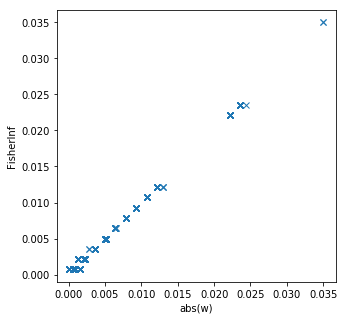

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number of perturbed weights is (case 2):    9596.0
The number

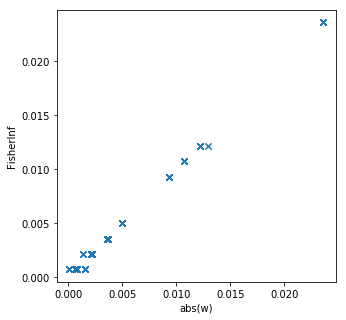

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

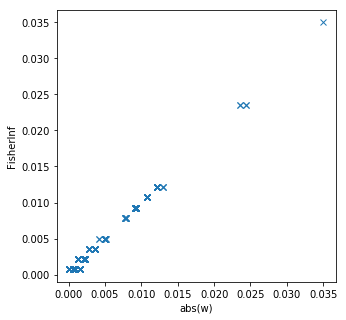

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

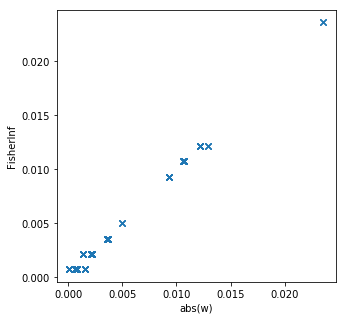

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number

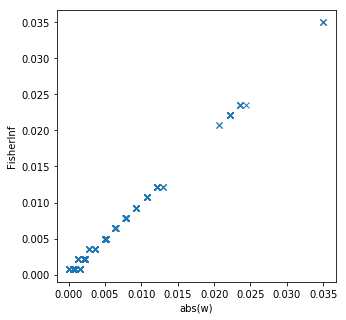

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number of perturbed weights is (case 2):    9588.0
The number

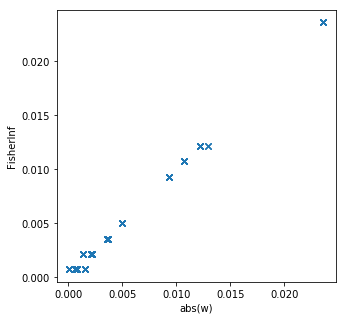

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number of perturbed weights is (case 2):    9562.0
The number

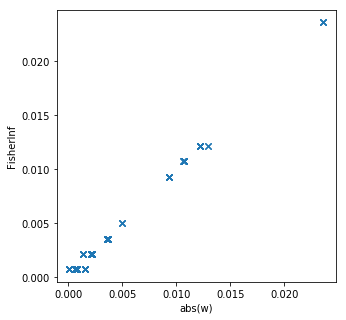

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

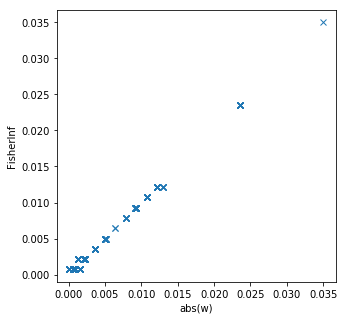

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number of perturbed weights is (case 2):    9564.0
The number

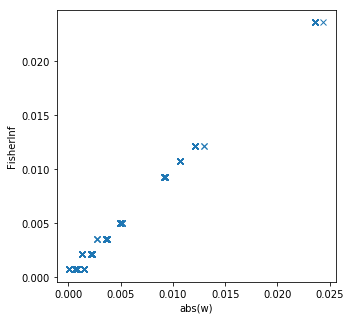

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

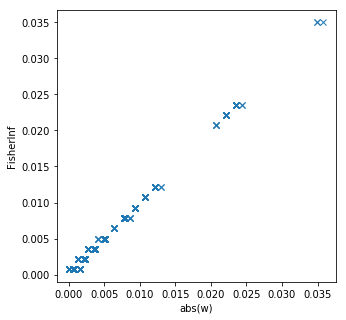

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number of perturbed weights is (case 2):    9602.0
The number

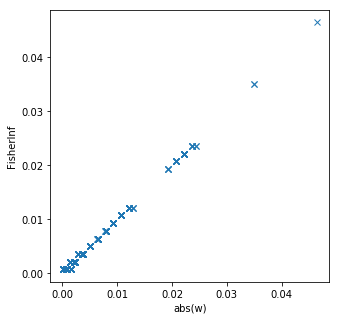

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number of perturbed weights is (case 2):    9636.0
The number

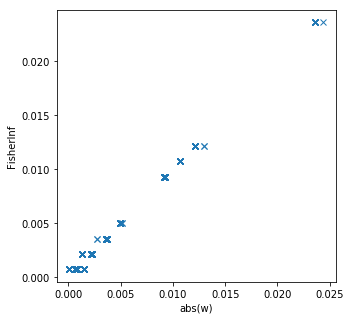

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

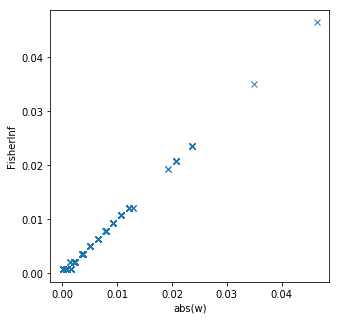

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number of perturbed weights is (case 2):    9622.0
The number

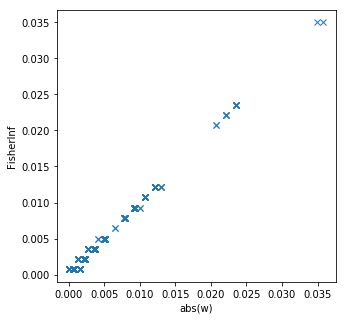

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number

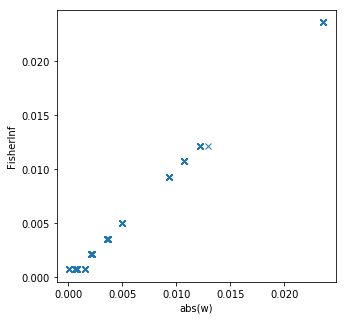

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

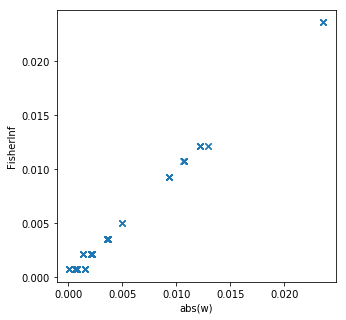

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number of perturbed weights is (case 2):    9552.0
The number

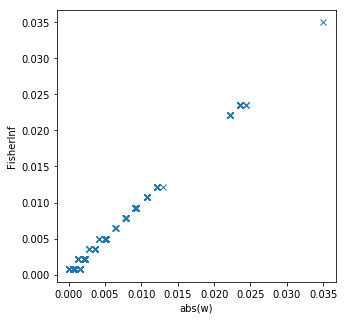

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number of perturbed weights is (case 2):    9574.0
The number

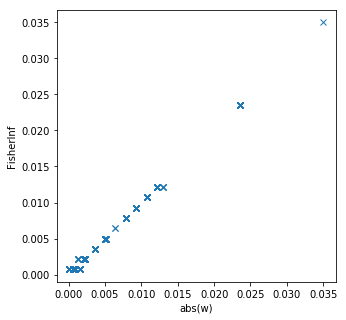

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number

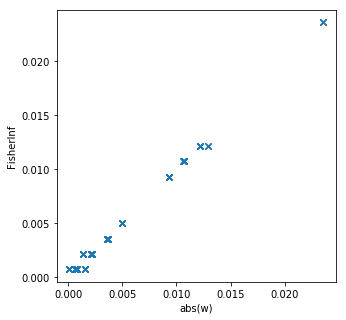

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number

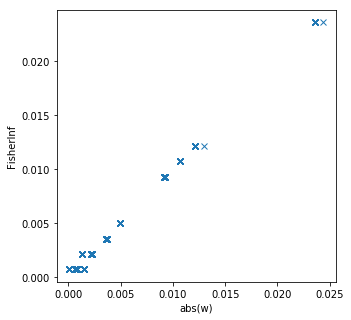

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

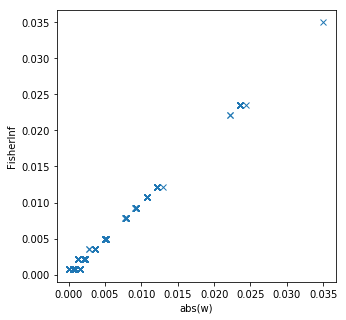

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number

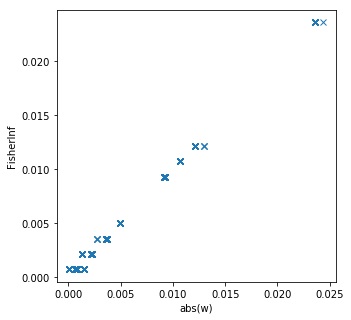

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

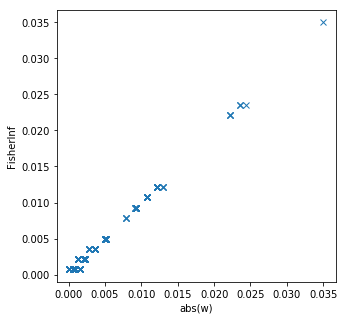

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number of perturbed weights is (case 2):    9558.0
The number

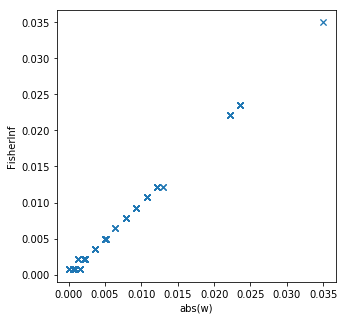

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number of perturbed weights is (case 2):    9584.0
The number

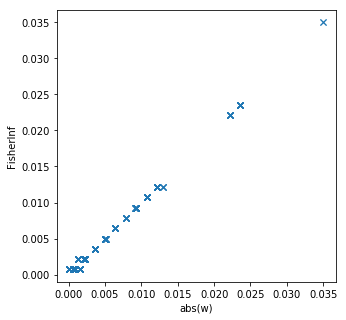

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number of perturbed weights is (case 2):    9572.0
The number

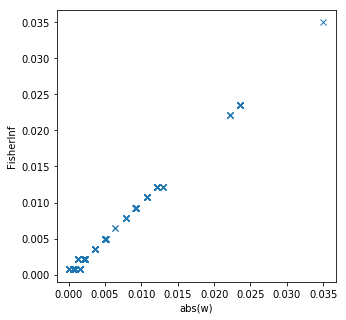

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number of perturbed weights is (case 2):    9566.0
The number

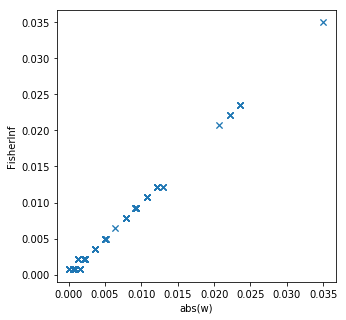

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number of perturbed weights is (case 2):    9576.0
The number

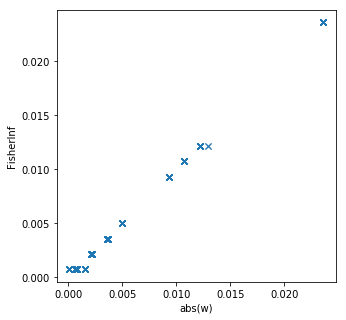

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number of perturbed weights is (case 2):    9556.0
The number

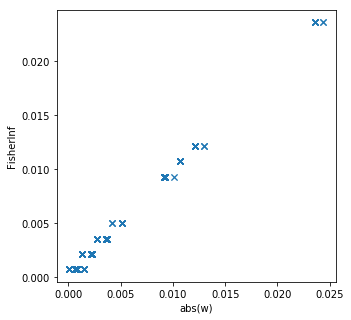

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

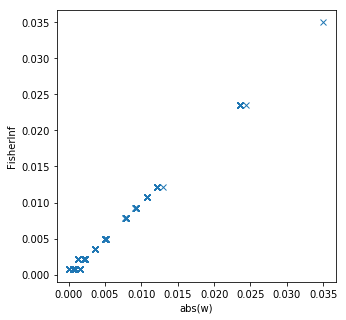

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number of perturbed weights is (case 2):    9580.0
The number

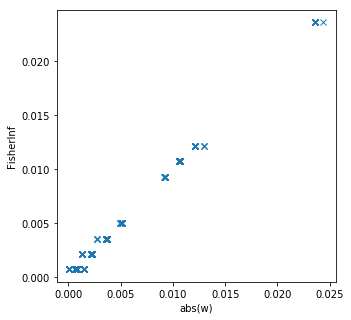

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number of perturbed weights is (case 2):    9554.0
The number

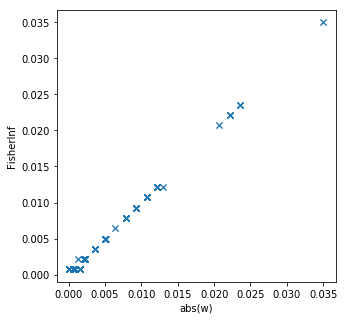

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

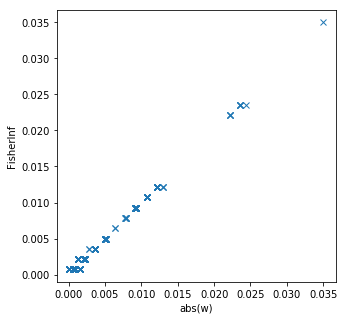

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number of perturbed weights is (case 2):    9560.0
The number

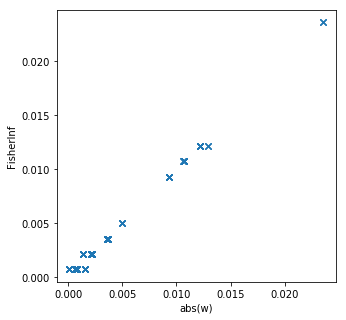

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number

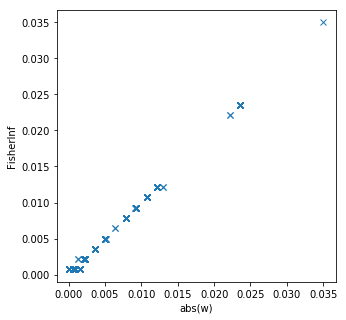

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number of perturbed weights is (case 2):    9570.0
The number

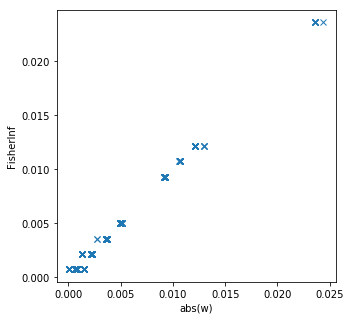

The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 1):    9600.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number of perturbed weights is (case 2):    9550.0
The number

**Finished**

In [9]:
printmd('**Started Learning**')

for trial in range(0, TRIALS):
    if trial % eval_f == 0:
        print('Running trial ', trial+1, ' / ', TRIALS)
    solver = solverClass()
    patterns = solver.create_patterns(SPARSITY, IMAGE_SIZE, NUM_PATTERNS)
    netFisher = hopfieldNet(IMAGE_SIZE, ETA, SPARSITY)
    p = np.zeros(shape=(IMAGE_SIZE**2, IMAGE_SIZE**2))
    mean_value = SPARSITY
    original_patterns = copy.deepcopy(patterns)
    patterns = patterns - mean_value
    overall_pattern = np.zeros(shape = np.shape(patterns[:,0]))

    for i in range(int(stored_patterns)):
        p += np.outer(patterns[:,i], patterns[:,i])
        overall_pattern += (patterns[:,i]+mean_value)
        netFisher.append_pattern(patterns[:,i], NTRAIN)
    w1 = p/70
    
    wF = w1
    for epoch in range(NTRAIN):
        diminish_lr = 2 * number_of_changed_values / (IMAGE_SIZE**2)**2
        z = diminish_lr  * ETA * (np.outer(patterns[:,stored_patterns+1], patterns[:,stored_patterns+1]) - wF)
        perturbation_vector = z
        wF = wF + perturbation_vector
        summed_perturbed0 += np.mean(np.abs(perturbation_vector))
        netFisher.set_weights(wF)

        overall_error = np.zeros(NTRAIN)
        for i in range(int(stored_patterns)):
            netFisher.present_pattern(original_patterns[:,i])
            netFisher.step(100)
            output = netFisher.s
            error[epoch] = np.sum((original_patterns[:,i]-output)**2)
            error[epoch] = dice_coefficient(original_patterns[:,i], output)
            overall_error[epoch] += error[epoch]

        netFisher.present_pattern(original_patterns[:,stored_patterns+1])
        netFisher.step(100)
        output = netFisher.s
        error[epoch] = np.sum((original_patterns[:,stored_patterns+1]-output)**2)
        error[epoch] = dice_coefficient(original_patterns[:,stored_patterns+1], output)

        complete_error_mean[trial, epoch] = overall_error[epoch]/stored_patterns
        complete_error_new_pattern[trial, epoch] = error[epoch]
        
    wH_final = netFisher.w
    
    
    if RUN_LOCAL == True:
        #Now disturbing the weights
        wF = w1
        for epoch in range(NTRAIN):
            z = ETA * (np.outer(patterns[:,stored_patterns+1], patterns[:,stored_patterns+1]) - wF)
            netFisher.curvature = np.abs(w1)
            weight_perturbation = less_changed_weight_value*np.ones(shape = np.shape(w1))
            np.fill_diagonal(weight_perturbation, 1)
            copied_curvature = copy.deepcopy(netFisher.curvature)
            np.fill_diagonal(copied_curvature, 1000) #setting it to a very high value such that the diagonal is not touched
            for i in range(number_of_changed_values):
                y_ind_current, x_ind_current = np.unravel_index(copied_curvature.argmin(), copied_curvature.shape)
                weight_perturbation[y_ind_current, x_ind_current] = 1
                weight_perturbation[x_ind_current, y_ind_current] = 1
                copied_curvature[y_ind_current, x_ind_current] = 2000
                copied_curvature[x_ind_current, y_ind_current] = 2000

            if (epoch % 100) == 0:
                print('The number of perturbed weights is (case 1):   ', np.sum(weight_perturbation))

            xyz = np.zeros(np.shape(w1))
            xyz[weight_perturbation == 1] = w1[weight_perturbation == 1]
            mean_w1_considered2 += np.mean(np.abs(xyz))
            perturbation_vector = weight_perturbation * z
            wF = wF + perturbation_vector
            summed_perturbed2 += np.mean(np.abs(perturbation_vector))
            netFisher.set_weights(wF)

            overall_errorFL = np.zeros(NTRAIN)
            for i in range(int(stored_patterns)):
                netFisher.present_pattern(original_patterns[:,i])
                netFisher.step(100)
                output = netFisher.s
                error[epoch] = np.sum((original_patterns[:,i]-output)**2)
                error[epoch] = dice_coefficient(original_patterns[:,i], output)
                overall_errorFL[epoch] += error[epoch]

            netFisher.present_pattern(original_patterns[:,stored_patterns+1])
            netFisher.step(100)
            output = netFisher.s
            error[epoch] = np.sum((original_patterns[:,stored_patterns+1]-output)**2)
            error[epoch] = dice_coefficient(original_patterns[:,stored_patterns+1], output)

            complete_error_meanFL[trial, epoch] = overall_errorFL[epoch]/stored_patterns
            complete_error_new_patternFL[trial, epoch] = error[epoch]

            if epoch == 0:
                x = np.abs(netFisher.w).flatten()
                netFisher.curvature = np.abs(w1)
                y = netFisher.curvature.flatten()
                plt.figure(figsize=(5,5))
                plt.plot(x,y, 'x')
                plt.xlabel('abs(w)')
                plt.ylabel('FisherInf')
                plt.show()

        wFL_final = netFisher.w

        #Now disturbing the weights
        wF = w1
        for epoch in range(NTRAIN):
            z = ETA * (np.outer(patterns[:,stored_patterns+1], patterns[:,stored_patterns+1]) - wF)
            netFisher.curvature = np.abs(w1)
            weight_perturbation = less_changed_weight_value*np.ones(shape = np.shape(w1))
            np.fill_diagonal(weight_perturbation, 1)

            weight_perturbation[np.abs(w1) < 0.008] = 1
            np.fill_diagonal(weight_perturbation, 1)
            if (epoch % 100) == 0:
                print('The number of perturbed weights is (case 2):   ', np.sum(weight_perturbation))

            xyz = np.zeros(np.shape(w1))
            xyz[weight_perturbation == 1] = w1[weight_perturbation == 1]
            mean_w1_considered2 += np.mean(np.abs(xyz))
            perturbation_vector = weight_perturbation * z
            wF = wF + perturbation_vector
            summed_perturbed2 += np.mean(np.abs(perturbation_vector))
            netFisher.set_weights(wF)

            overall_errorFLT = np.zeros(NTRAIN)
            for i in range(int(stored_patterns)):
                netFisher.present_pattern(original_patterns[:,i])
                netFisher.step(100)
                output = netFisher.s
                error[epoch] = np.sum((original_patterns[:,i]-output)**2)
                error[epoch] = dice_coefficient(original_patterns[:,i], output)
                overall_errorFLT[epoch] += error[epoch]

            netFisher.present_pattern(original_patterns[:,stored_patterns+1])
            netFisher.step(100)
            output = netFisher.s
            error[epoch] = np.sum((original_patterns[:,stored_patterns+1]-output)**2)
            error[epoch] = dice_coefficient(original_patterns[:,stored_patterns+1], output)

            complete_error_meanFLT[trial, epoch] = overall_errorFLT[epoch]/stored_patterns
            complete_error_new_patternFLT[trial, epoch] = error[epoch]

            #if epoch == (NTRAIN-1):
            #    x = np.abs(netFisher.w).flatten()
            #    netFisher.curvature = np.abs(w1)
            #    y = netFisher.curvature.flatten()
            #    plt.figure(figsize=(5,5))
            #    plt.plot(x,y, 'x')
            #    plt.xlabel('abs(w)')
            #    plt.ylabel('FisherInf')
            #    plt.show()

        wFLT_final = netFisher.w
    

    #Now disturbing the weights
    wF = w1
    for epoch in range(NTRAIN):
        z = ETA * (np.outer(patterns[:,stored_patterns+1], patterns[:,stored_patterns+1]) - wF)
        #netFisher.calculate_fisher_information(patterns[:,0:stored_patterns+1])
        netFisher.calculate_fisher_information(patterns[:,0:stored_patterns])
        weight_perturbation = less_changed_weight_value*np.ones(shape = np.shape(w1))
        np.fill_diagonal(weight_perturbation, 1)
        copied_curvature = copy.deepcopy(netFisher.curvature)
        np.fill_diagonal(copied_curvature, 1000) #setting it to a very high value such that the diagonal is not touched
        for i in range(number_of_changed_values):
            y_ind_current, x_ind_current = np.unravel_index(copied_curvature.argmin(), copied_curvature.shape)
            weight_perturbation[y_ind_current, x_ind_current] = 1
            weight_perturbation[x_ind_current, y_ind_current] = 1
            copied_curvature[y_ind_current, x_ind_current] = 2000
            copied_curvature[x_ind_current, y_ind_current] = 2000

        xyz = np.zeros(np.shape(w1))
        xyz[weight_perturbation == 1] = w1[weight_perturbation == 1]
        mean_w1_considered2 += np.mean(np.abs(xyz))
        perturbation_vector = weight_perturbation * z
        wF = wF + perturbation_vector
        summed_perturbed2 += np.mean(np.abs(perturbation_vector))
        netFisher.set_weights(wF)

        overall_errorFI = np.zeros(NTRAIN)
        for i in range(int(stored_patterns)):
            netFisher.present_pattern(original_patterns[:,i])
            netFisher.step(100)
            output = netFisher.s
            error[epoch] = np.sum((original_patterns[:,i]-output)**2)
            error[epoch] = dice_coefficient(original_patterns[:,i], output)
            overall_errorFI[epoch] += error[epoch]

        netFisher.present_pattern(original_patterns[:,stored_patterns+1])
        netFisher.step(100)
        output = netFisher.s
        error[epoch] = np.sum((original_patterns[:,stored_patterns+1]-output)**2)
        error[epoch] = dice_coefficient(original_patterns[:,stored_patterns+1], output)

        complete_error_meanFI[trial, epoch] = overall_errorFI[epoch]/stored_patterns
        complete_error_new_patternFI[trial, epoch] = error[epoch]

        #if epoch == (NTRAIN-1):
        #    x = np.abs(netFisher.w).flatten()
        #    netFisher.calculate_fisher_information(patterns[:,0:stored_patterns+1])
        #    y = netFisher.curvature.flatten()
        #    plt.figure(figsize=(5,5))
        #    plt.plot(x,y, 'x')
        #    plt.xlabel('abs(w)')
        #    plt.ylabel('FisherInf')
        #    plt.show()

    #Now disturbing the weights using hebbian way for fisher information
    if RUN_LOCAL == True:
        wF = w1
        for epoch in range(NTRAIN):
            z = ETA * (np.outer(patterns[:,stored_patterns+1], patterns[:,stored_patterns+1]) - wF)
            #netFisher.calculate_fisher_information(patterns[:,0:stored_patterns+1])
            netFisher.calculate_fisher_information_hebbian(patterns[:,0:stored_patterns])
            weight_perturbation = less_changed_weight_value*np.ones(shape = np.shape(w1))
            np.fill_diagonal(weight_perturbation, 1)
            copied_curvature = copy.deepcopy(netFisher.curvature)
            np.fill_diagonal(copied_curvature, 1000) #setting it to a very high value such that the diagonal is not touched
            for i in range(number_of_changed_values):
                y_ind_current, x_ind_current = np.unravel_index(copied_curvature.argmin(), copied_curvature.shape)
                weight_perturbation[y_ind_current, x_ind_current] = 1
                weight_perturbation[x_ind_current, y_ind_current] = 1
                copied_curvature[y_ind_current, x_ind_current] = 2000
                copied_curvature[x_ind_current, y_ind_current] = 2000

            xyz = np.zeros(np.shape(w1))
            xyz[weight_perturbation == 1] = w1[weight_perturbation == 1]
            mean_w1_considered2 += np.mean(np.abs(xyz))
            perturbation_vector = weight_perturbation * z
            wF = wF + perturbation_vector
            summed_perturbed2 += np.mean(np.abs(perturbation_vector))
            netFisher.set_weights(wF)

            overall_errorFIH = np.zeros(NTRAIN)
            for i in range(int(stored_patterns)):
                netFisher.present_pattern(original_patterns[:,i])
                netFisher.step(100)
                output = netFisher.s
                error[epoch] = np.sum((original_patterns[:,i]-output)**2)
                error[epoch] = dice_coefficient(original_patterns[:,i], output)
                overall_errorFIH[epoch] += error[epoch]

            netFisher.present_pattern(original_patterns[:,stored_patterns+1])
            netFisher.step(100)
            output = netFisher.s
            error[epoch] = np.sum((original_patterns[:,stored_patterns+1]-output)**2)
            error[epoch] = dice_coefficient(original_patterns[:,stored_patterns+1], output)

            complete_error_meanFIH[trial, epoch] = overall_errorFIH[epoch]/stored_patterns
            complete_error_new_patternFIH[trial, epoch] = error[epoch]

            #if epoch == (NTRAIN-1):
            #    x = np.abs(netFisher.w).flatten()
            #    netFisher.calculate_fisher_information(patterns[:,0:stored_patterns+1])
            #    y = netFisher.curvature.flatten()
            #    plt.figure(figsize=(5,5))
            #    plt.plot(x,y, 'x')
            #    plt.xlabel('abs(w)')
            #    plt.ylabel('FisherInf')
            #    plt.show()

        wFIH_final = netFisher.w
printmd('**Finished**')

In [10]:
savedict = {
    'trad_80_O': complete_error_mean,
    'trad_80_N': complete_error_new_pattern,
    'FL_O': complete_error_meanFL,
    'FL_N': complete_error_new_patternFL,
    'FLT_O': complete_error_meanFLT,
    'FLT_N': complete_error_new_patternFLT,
    'FI_O': complete_error_meanFI,
    'FI_N': complete_error_new_patternFI,
    'FIH_O': complete_error_meanFIH,
    'FIH_N': complete_error_new_patternFIH }

np.savez("Complete_errors2.npz", **savedict)

In [16]:
savedict = np.load("Complete_errors.npz")

In [53]:
def plot_stuff(what, label):
    global axisn
    plt.subplot(5,2,axisn)
    axisn += 1
    center = np.median(what, axis=0)
    edges = np.percentile(what, [25, 75], axis=0)
    plt.plot(center, label=label)
    plt.fill_between(np.arange(len(center)), *edges, alpha=.3)
    plt.ylabel('Pixel Error %')
    plt.ylim([0, 1.1])
    plt.legend(loc='upper right')

Text(0.5,0,'n. Iterations')

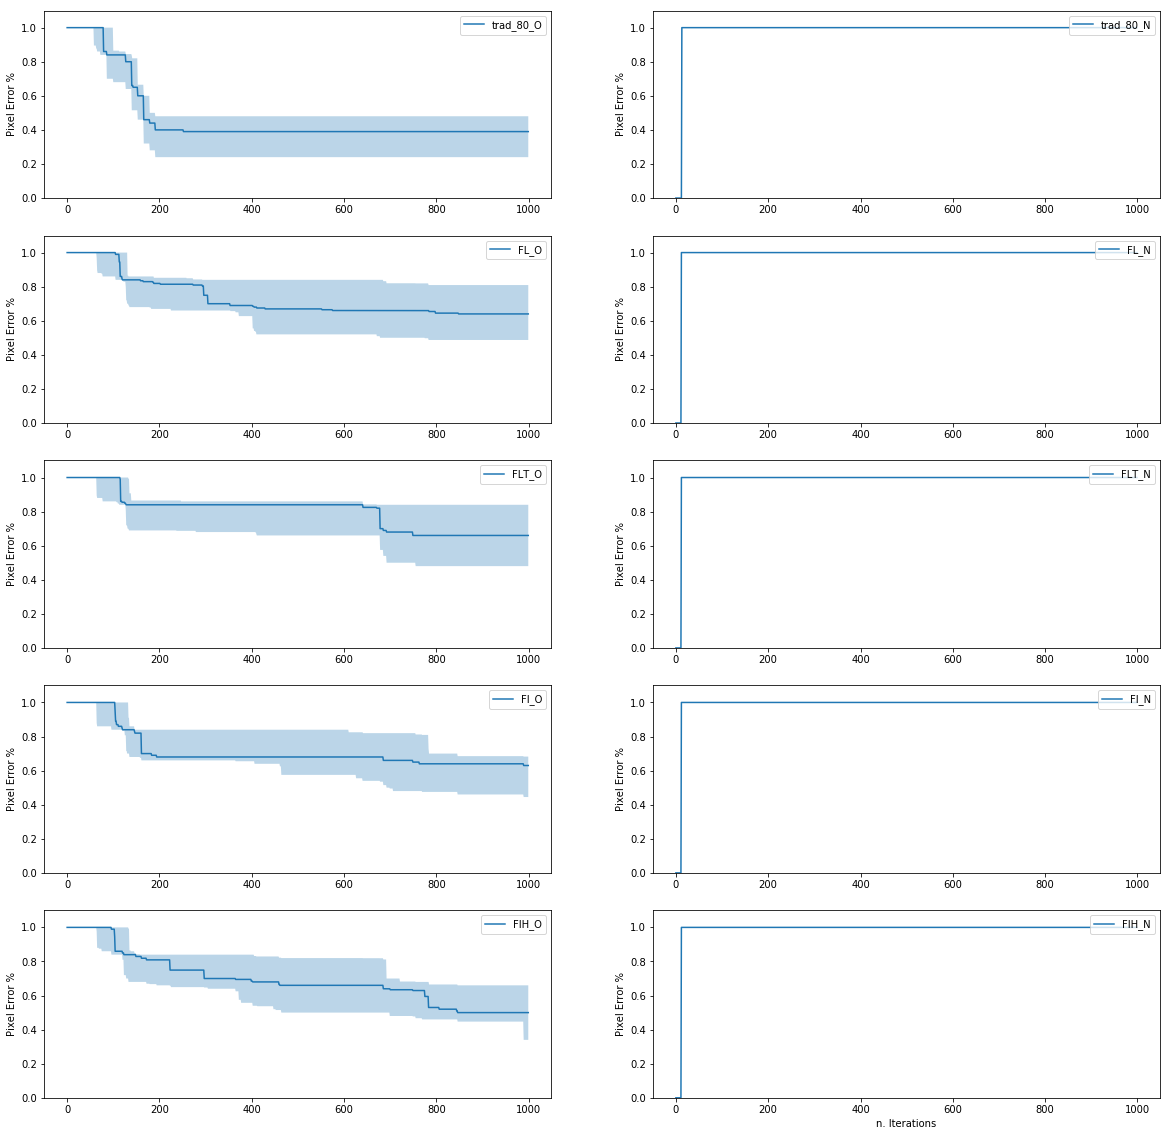

In [54]:
plt.subplots(2, 5, figsize=(20,20))

keys = ['trad_80_O', 'trad_80_N', 'FL_O', 'FL_N', 'FLT_O', 'FLT_N', 'FI_O', 'FI_N', 'FIH_O', 'FIH_N']

axisn = 1
for k in keys:
    plot_stuff(savedict[k], label=k)

# axisn = 1
# plot_stuff(savedict[keys[axisn-1]], 'Perturbing all weights equally with only 80% learning rate')
# plt.title('Old pattern',fontweight='bold', fontsize=20)

# plot_stuff(savedict[keys[axisn-1]], 'Perturbing all weights equally with only 80% learning rate')
# plt.title('New pattern',fontweight='bold', fontsize=20)

# if RUN_LOCAL == True:
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using a Local Rule')
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using a Local Rule')
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using an entirely Local Rule')
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using an entirely Local Rule')
    
# plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using Fisher information')
# plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using Fisher information')

# if RUN_LOCAL == True:
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using Fisher information Hebbian')
#     plot_stuff(savedict[keys[axisn-1]], label = 'Perturbing all weights using Fisher information Hebbian')
    
plt.xlabel("n. Iterations")

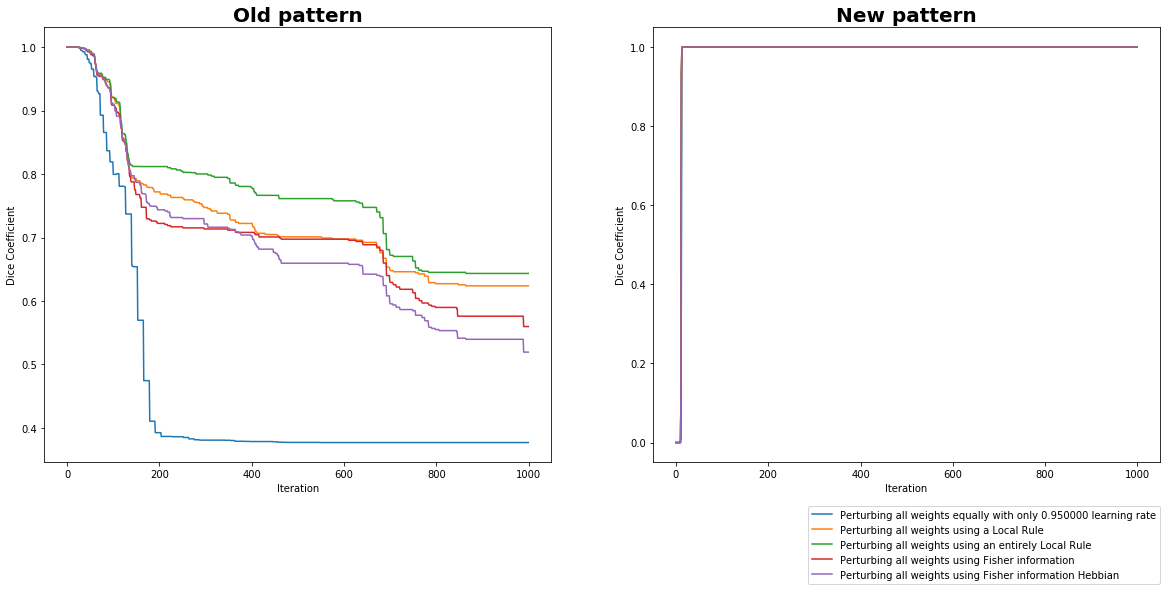

In [58]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)

old_H, = plt.plot(np.mean(complete_error_mean, axis = 0), label = 'Perturbing all weights equally with only %f learning rate'%diminish_lr)
old_FL, = plt.plot(np.mean(complete_error_meanFL, axis = 0), label = 'Perturbing all weights using a Local Rule')
old_FLT, = plt.plot(np.mean(complete_error_meanFLT, axis = 0), label = 'Perturbing all weights using an entirely Local Rule')
old_FI, = plt.plot(np.mean(complete_error_meanFI, axis = 0), label = 'Perturbing all weights using Fisher information')
old_FIH, = plt.plot(np.mean(complete_error_meanFIH, axis = 0), label = 'Perturbing all weights using Fisher information Hebbian')

plt.title('Old pattern',fontweight='bold', fontsize=20)
plt.xlabel('Iteration')
plt.ylabel('Dice Coefficient')
plt.legend(handles = [old_H, old_FL, old_FLT, old_FI, old_FIH], bbox_to_anchor=(1, -0.1), loc=1, borderaxespad=0.)

display_values_until = 3000

plt.subplot(1,2,2)
a = np.mean(complete_error_new_pattern, axis = 0)
b = np.mean(complete_error_new_patternFL, axis = 0)
c = np.mean(complete_error_new_patternFLT, axis = 0)
d = np.mean(complete_error_new_patternFI, axis = 0)
e = np.mean(complete_error_new_patternFIH, axis = 0)

new_H, = plt.plot(a[0:display_values_until], label = 'Perturbing all weights equally with only %f learning rate'%diminish_lr)
new_FL, = plt.plot(b[0:display_values_until], label = 'Perturbing all weights using a Local Rule')
new_FLT, = plt.plot(c[0:display_values_until], label = 'Perturbing all weights using an entirely Local Rule')
new_FI, = plt.plot(d[0:display_values_until], label = 'Perturbing all weights using Fisher information')
new_FIH, = plt.plot(e[0:display_values_until], label = 'Perturbing all weights using Fisher information Hebbian')

plt.title('New pattern',fontweight='bold', fontsize=20)
plt.xlabel('Iteration')
plt.ylabel('Dice Coefficient')
plt.legend(handles = [new_H, new_FL, new_FLT, new_FI, new_FIH], bbox_to_anchor=(1, -0.1), loc=1, borderaxespad=0.)
plt.show()

In [112]:
def plot_stuff_together(what, label, axisn):
    plt.subplot(1, 2, axisn)
    center = np.median(what, axis=0)
    edges = np.percentile(what, [25, 75], axis=0)
    l = plt.plot(center, label=label, linewidth=2.5)
    c = l[0].get_color()
    plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color=c)
    plt.plot(edges.T, color=c, alpha=.2)
    plt.ylabel('Pixel Error %')
    plt.ylim([0, 1.1])
    plt.legend(loc='lower right')

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Dice Coefficient')

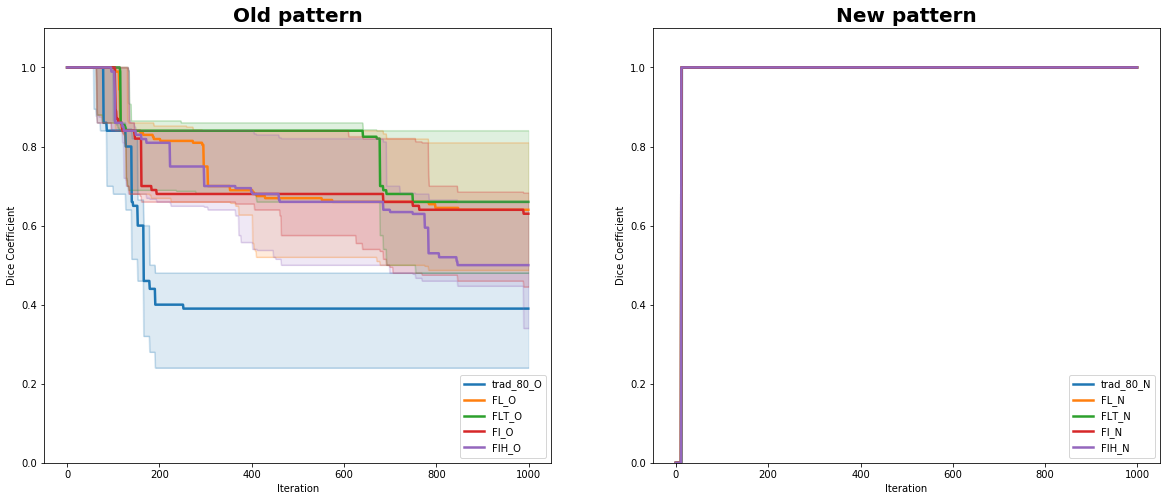

In [113]:
plt.figure(figsize = (20,8))

for k in keys:
    axisn = 2 if k[-1] == 'N' else 1
    plot_stuff_together(savedict[k], label=k, axisn=axisn)
    
plt.subplot(122)
plt.title('New pattern',fontweight='bold', fontsize=20)
plt.xlabel('Iteration')
plt.ylabel('Dice Coefficient')

plt.subplot(121)
plt.title('Old pattern',fontweight='bold', fontsize=20)
plt.xlabel('Iteration')
plt.ylabel('Dice Coefficient')

In [74]:
plt.close()